In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
titanic_dataset = pd.read_excel("Titanic-Dataset.xlsx")
titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712833.00,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.00,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [3]:
titanic_dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [5]:
titanic_dataset.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), object(1), str(4)
memory usage: 83.7+ KB


In [6]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# make a copy of the dataframe
titanic = titanic_dataset.copy()
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='str')

In [8]:
# Rename some columns
titanic.rename(columns={"Pclass" : "Ticket class", "SibSp" : "#siblings/spouses_aboard", 
                        "Parch" : "#parents/children_aboard", "Ticket" : "Ticket number",
                        "Fare" : "Passenger fare", "Cabin" : "Cabin number", "Embarked" : "Port embarkation"}, inplace = True)
titanic.columns

Index(['PassengerId', 'Survived', 'Ticket class', 'Name', 'Sex', 'Age',
       '#siblings/spouses_aboard', '#parents/children_aboard', 'Ticket number',
       'Passenger fare', 'Cabin number', 'Port embarkation'],
      dtype='str')

In [9]:
# replace the NAN in the Age column by the median of the column Age
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median()) 

# replace the NAN in Embarked column by the mode of the column
titanic["Port embarkation"] = titanic["Port embarkation"].fillna(titanic["Port embarkation"].mode()[0])   

# # replace the NAN in cabin number column by "unknown"
titanic["Cabin number"] = titanic["Cabin number"].fillna("unknown")

In [10]:
titanic.isna().sum()

PassengerId                 0
Survived                    0
Ticket class                0
Name                        0
Sex                         0
Age                         0
#siblings/spouses_aboard    0
#parents/children_aboard    0
Ticket number               0
Passenger fare              0
Cabin number                0
Port embarkation            0
dtype: int64

There are some different age values like: 40.5, 0.75... etc.
We apply a round to aproximate to an integer value

In [11]:
titanic["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
#apply math.ceil to round to he higher value
titanic["Age"]= titanic["Age"].apply(math.ceil)

In [17]:
titanic["Age"].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  1, 30, 33, 23, 24, 46, 59, 71, 37, 47, 12,  9, 51, 56, 41,
       44, 61, 50, 36, 62, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80, 70,
        6, 74])

In [54]:
survived_values = titanic["Survived"].value_counts().sort_index()
#survived_values.plot(kind="bar", xlabel = "Survival status 1:yes 0:no", ylabel = "N° of passengers", title ="Survival distribution")

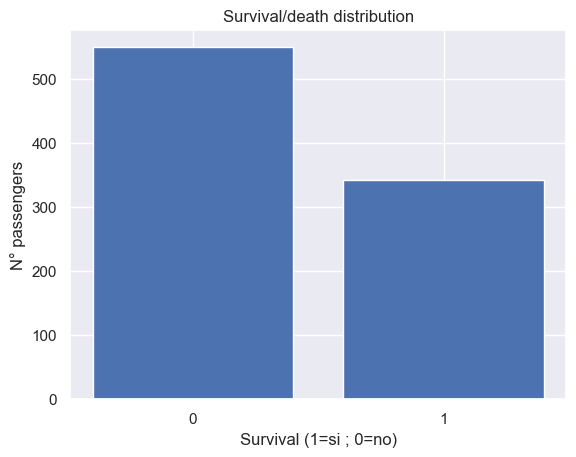

In [53]:
sns.set()
plt.figure()
plt.bar(survived_values.index.astype(str), survived_values.values)
plt.title("Survival/death distribution")
plt.ylabel("N° passengers")
plt.xlabel("Survival (1=si ; 0=no)")14qrt
plt.show()